In [1]:
! pip install prince

    100% |████████████████████████████████| 13.9MB 3.4MB/s 
  Using cached https://files.pythonhosted.org/packages/fc/43/fd867e3347559845c8f993059d410c50a1e18709f1c4d4b3b47323a06a37/pandas-0.24.2-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4
  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4


In [2]:
import pandas as pd

X = pd.DataFrame(
    data=[
         ['A', 'A', 'A', 2, 5, 7, 6, 3, 6, 7],
         ['A', 'A', 'A', 4, 4, 4, 2, 4, 4, 3],
         ['B', 'A', 'B', 5, 2, 1, 1, 7, 1, 1],
         ['B', 'A', 'B', 7, 2, 1, 2, 2, 2, 2],
         ['B', 'B', 'B', 3, 5, 6, 5, 2, 6, 6],
         ['B', 'B', 'A', 3, 5, 4, 5, 1, 7, 5]
     ],
     columns=['E1 fruity', 'E1 woody', 'E1 coffee',
              'E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody',
              'E3 fruity', 'E3 butter', 'E3 woody'],
     index=['Wine {}'.format(i+1) for i in range(6)]
 )
X['Oak type'] = [1, 2, 2, 2, 1, 1]

In [3]:
X

,E1 fruity,E1 woody,E1 coffee,E2 red fruit,E2 roasted,E2 vanillin,E2 woody,E3 fruity,E3 butter,E3 woody,Oak type
Wine 1,A,A,A,2,5,7,6,3,6,7,1
Wine 2,A,A,A,4,4,4,2,4,4,3,2
Wine 3,B,A,B,5,2,1,1,7,1,1,2
Wine 4,B,A,B,7,2,1,2,2,2,2,2
Wine 5,B,B,B,3,5,6,5,2,6,6,1
Wine 6,B,B,A,3,5,4,5,1,7,5,1


In [5]:
import prince
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
famd = famd.fit(X.drop('Oak type', axis='columns'))  # No need for 'Oak type'

In [7]:
famd.row_coordinates(X)

,0,1
Wine 1,3.35147,4.27885
Wine 2,3.39687,4.13574
Wine 3,4.77764,-1.64325
Wine 4,4.76971,-1.66525
Wine 5,3.77939,-3.05354
Wine 6,3.46541,-0.304409


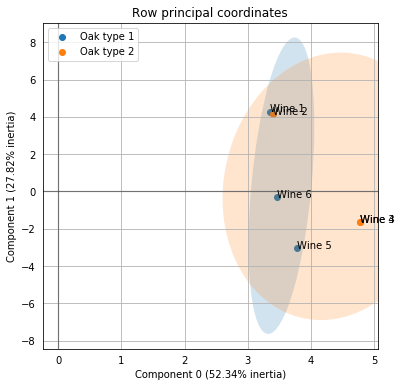

In [10]:
ax = famd.plot_row_coordinates(
    X,
    ax=None,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    labels=X.index,
    color_labels=['Oak type {}'.format(t) for t in X['Oak type']],
    ellipse_outline=False,
    ellipse_fill=True,
    show_points=True
)